# Linear Regression Models on Boston Housing Dataset: Predicting Median Home Value and Nitric Oxides Concentration

## Frame the problem and look at the big picture:

#### "The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted."

In [1]:
import pandas as pd
import numpy as np

#### Get the Data.

#### For this dataset, we are given a messy information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston). When downloaded to a TextEdit file, the data saves as an RTF, and when read into jupyter notebooks the data comes out noisey in a nested dictionary of sorts. In order to turn this disaster of messy data into a clean, useful dataframe, we must parse our data with a regex delimiter to get all the numeric instances from the data. The code in the next few cells shows how this was accomplished. 

In [2]:
result = []


with open('/Users/ryanmartin/Desktop/Boston.rtf') as f:
    for line in f:
        line = line.split(" (")  # remove '\n'
        result.append(line)

import re

inilist = result
regex = re.findall(r'[-+]?\d*\.\d+|\d+', str(result))
data = regex[33:]
#print(data)

In [3]:

i=0
data_list=[]
while i<len(data):
  data_list.append(data[i:i+14])
  i+=14

data = pd.DataFrame(data_list, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
                              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


## Explore the data to get insights:

#### Luckily this dataset will not need much feature engineering because there are no missing values (see cell 5). But in our data retrieval processes we have accidentally converted these features to objects, when they are actually numeric values. This will be easily handled with a simple apply() function. 

In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### We will then explore the data by studying its attributes and characteristics. By calling the pandas info function we can see all the datatypes present in each feature in the data. This information will be useful during the feature engineering stage, where we must prepare the data for the machine learning models. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null object
ZN         506 non-null object
INDUS      506 non-null object
CHAS       506 non-null object
NOX        506 non-null object
RM         506 non-null object
AGE        506 non-null object
DIS        506 non-null object
RAD        506 non-null object
TAX        506 non-null object
PTRATIO    506 non-null object
B          506 non-null object
LSTAT      506 non-null object
MEDV       506 non-null object
dtypes: object(14)
memory usage: 55.4+ KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
unique,504,26,76,2,81,446,356,412,9,66,46,357,455,229
top,14.33370,0.00,18.100,0,0.5380,6.2290,100.00,3.4952,24,666.0,20.20,396.90,8.05,50.00
freq,2,372,132,471,23,3,43,5,132,132,140,121,3,16


In [7]:
data = data.apply(pd.to_numeric)

#### In our data description, we see that we have a almost a perfect bell curve distribution of "MEDV" which are the median home values; however, the "NOX" values are much more sparse and sporatically distributed. 

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### We now have all numeric features. 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


#### This histogram shows the distribution of each of the features.

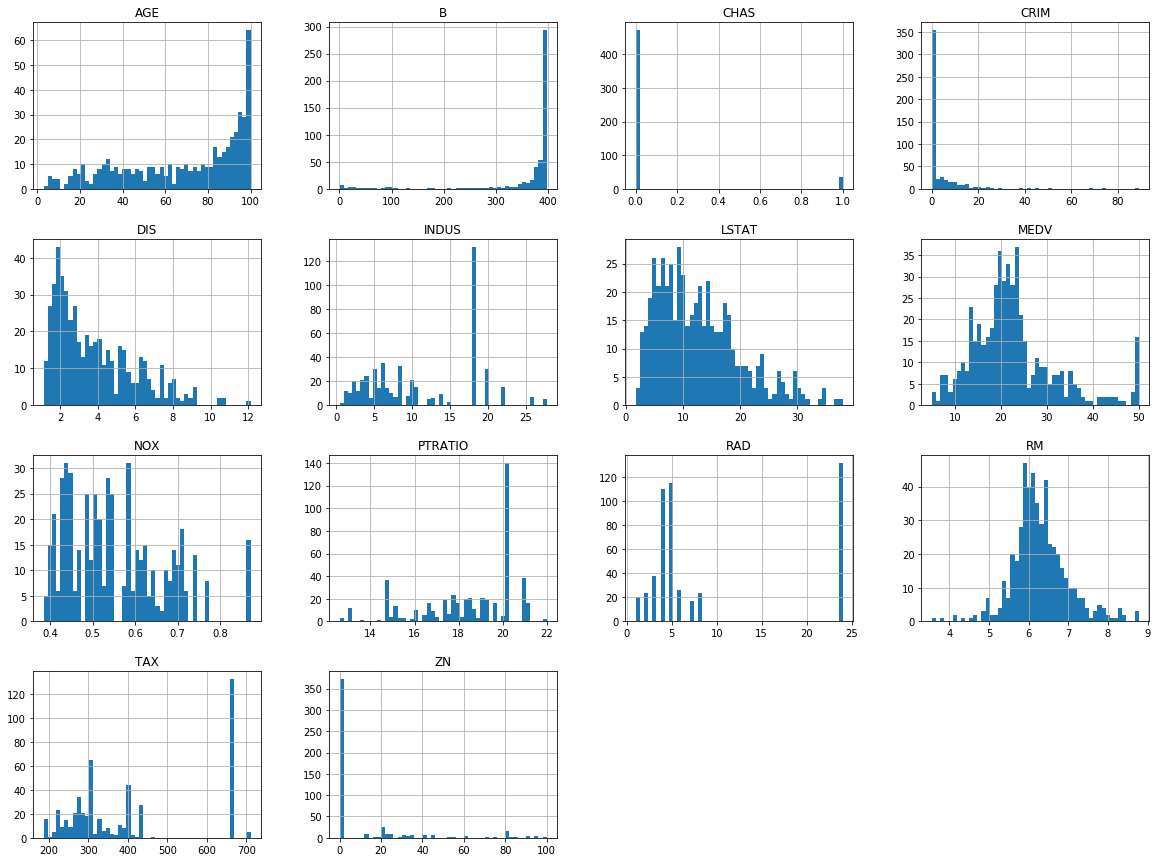

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show();

In [12]:
housing = data

In [13]:
corr_matrix = housing.corr()

#### First, we will build a model to make predictions of the "MEDV" label, or median home value. 

#### By calculating the correlation between the features and MEDV, we can see that RM, ZN, and B are the most positively correlated features. The CHAS of the housing set is less correlated, and the LSTAT is very negatively correlated to the MEDV, so it is the most important variable feature. 

In [14]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

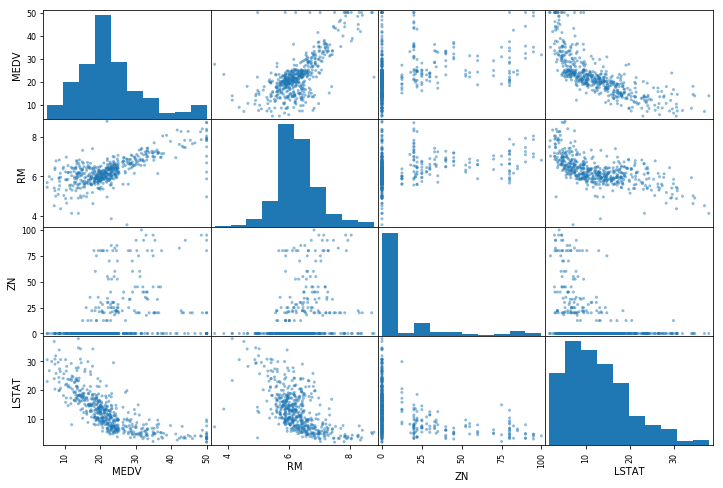

In [15]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "ZN",
              "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8));

#### Out of all the features, "RM", or the average number of rooms per dwelling, is the most positively correlated and the "LSTAT", or the percent lower status of the popualtion, is the most negatively correlated feature. 

#### Because we are not missing any features, the data cleaning portion of this dataset is non-intensive. We will move on to scaling our data through a pipeline on our training set to be used in our model. 

#### We will use a standard scaler for Standarization, which will subtract the mean value and then divide it by the standard deviation so that the resulting distribution has unit variance. This will lower the effectiveness of outliers.

## Prepare the Data

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = pipeline = Pipeline([
    ('std_scaler', StandardScaler()) 
])

housing_prepared = full_pipeline.fit_transform(housing)

#### housing_prepared demonstrates the output of scaling the data. The real data training with occur below after train/ test split. 

In [17]:
housing_prepared

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

# Train Test Split

#### To avoid creating a machine learning model that would just repeat the labels that it had just seen and fail to predict any new unseen data, we must divide and set aside a portion of our data as a test set (X_test, y_test). This will help avoid the situation of overfitting our model.

#### Since we are at first predicting the MEVD, we will create our test set by setting the MEDV equal to y and the rest of the features as X. 

In [18]:
from sklearn.model_selection import train_test_split

y = housing["MEDV"]
X = housing.drop(["MEDV"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


## Select and Train a Model

#### We will train our model using linear regression with regularization. Because many of our features are strongely correlated to our prediction class ("MEDV"), we will use regularization that will reduce overfitting by constraining the degrees of freedom and by keeping the model weights as small as possible. 

In [19]:
from sklearn.linear_model import Ridge

In [20]:
ridge = Ridge(alpha=0.1, solver = "cholesky") #, l1_ratio=0.5)

In [21]:
lr = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('classifier', ridge)])

#### We will then fit our model to our training data through the pipeline we created in the cell above. The training data first is scaled with the standard scaler to reduce the influence of outliers, then it is trained with ridge regression by computing the weighted sums of the biased term with alpha added to the cost function. If alpha is very large, then all weights end up closing in on zero and the result is a flat line going through the mean. 

#### When we do ridge regression, we're trying to minimize the following cost function:

#### (y−Xβ)T(y−Xβ)+λβTβ

In [22]:
lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('std_scaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('classifier',
                 Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='cholesky', tol=0.001))],
         verbose=False)

In [23]:
y_pred = lr.predict(X_test)

#### Evaluating Our Trained Model With Root Mean Square Error(RMSE) and Mean Absolute Error (MAE):

The mean squared error (MSE) measures the average of the squares of the errors, which is the average squared difference between the estimated values and the actual value. The RMSE and MAE measure the distance between two vectors: the vectors of the predictions and the vector of the target values. Usually, the RMSE score will be larger in datasets that have many outlier. This is clearly happening in our case because we have a higher norm index. 

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [24]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.784276329477451

In [25]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

3.8431047219898766

#### Our MAE score tells us that our model can predict the price of the homes in boston worth under 50,000 dollars within 3,800 dollars of its actual value. 

## Gradient Boosted Regression Tree:


#### We will select another model in an attempt to improve our MAE score and make a final selection. Our next model will be a Gradient Boosted Regression Tree (GBRT), which is a generalization of boosting to arbitrary differentiable loss functions. It works by sequentially adding predictors to an ensemble, each one correcting its predecessor. This method then tries to fit the new predictor to the residual errors made by the previous predictor. 

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbr = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('classifier', gbrt)])
gbr.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1

gbr_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbr_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=60,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:

min_error = np.min(errors)

### Regularization of Gradient Boosting Regressor with early stopping:

#### Early stopping works by stopping the training process as soon as the validation error reaches a global minimum. As the algorithm runs through the epochs, the model learns, and the prediction error (RMSE) on the training set consequentially goes down. 

In [29]:
#gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbr_best.n_estimators = n_estimators
    gbr_best.fit(X_train, y_train)
    y_pred = gbr_best.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [30]:
print(gbrt.n_estimators)

120


In [31]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 23.01919387034353


In [32]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.803650837534946

#### The Gradient Boosting Regressor with early stopping performed significantly better than the ridge model. We will keep this in mind when we make our final selection.

In [33]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

2.865109610833408

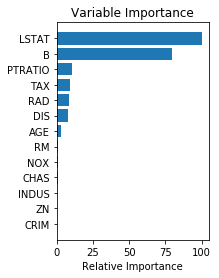

In [34]:
feature_importance = gbrt.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# XGBoost

#### Finally, we will experiment with XGBoost. XGBoost is basically an optimized version of Gradient Boosted Trees because it considers the potential loss for all possible splits to create a new branch. XGBoost looks at the distribution of features across all data points in a leaf and uses them to reduce the search space of possible feature splits.

In [35]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [36]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_ = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('classifier', xgb_reg)])
    xgb_.fit(X_train, y_train)
    y_pred = xgb_.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    print("Validation MSE:", val_error)

[02:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MSE: 21.467616446970794


/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [37]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.63331592350131

#### Our MAE score improved slightly with XGBoost, so we will use this model as our final model.

In [38]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

2.7407673218671014

## Evaluate our best model on the test set

#### Below are the results of our final model using XGBoost. This model will basically predict the MEDV within 2.86 of actual MEDV without overfitting. 

In [39]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

final_scores = cross_val_score(xgb_,  X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
final_rmse_scores = np.sqrt(-final_scores)
display_scores(final_rmse_scores)

/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Scores: [2.59889548 2.40284154 2.17967535 4.42220455 2.42796543 2.92646844
 3.42158029 3.04444426 2.80754835 2.41765229]
Mean: 2.8649275997156125
Standard deviation: 0.6260301927284697


/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Text(0, 0.5, 'Predicted Y')

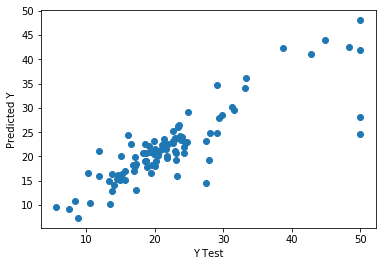

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [41]:
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, y_pred)

In [42]:
"MSE:", final_mse

('MSE:', 21.467616446970794)

In [43]:
"RMSE:", final_rmse

('RMSE:', 4.63331592350131)

In [44]:
"RMSE:", final_mae

('RMSE:', 2.7407673218671014)

#### Residual Plot:
#### In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual.

#### Residual = Observed value - Predicted value e = y - ŷ

#### Both the sum and the mean of the residuals are equal to zero. That is, Σ e = 0 and e = 0.

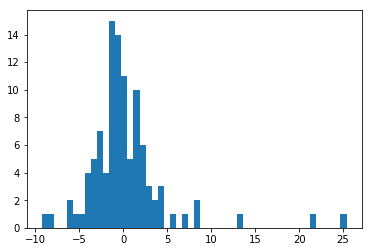

In [45]:
plt.hist((y_test-y_pred),bins=50);

# Predicting the NOX

#### Because this model uses the same dataset as the housing price model, we will only have to change our X and y values and begin at selecting and training a model. 

# Select and Train a Model: 

#### We will train our model using linear regression with regularization. Because many of our features are strongely correlated to our prediction class ("NOX"), we will use regularization that will reduce overfitting by constraining the degrees of freedom and by keeping the model weights as small as possible. 



In [46]:
y = housing["NOX"]
X = housing.drop(["NOX"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [47]:
from sklearn.linear_model import Ridge

In [48]:
elastic_net = Ridge(alpha=0.1, solver = "cholesky") #, l1_ratio=0.5)

In [49]:
lr = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('classifier', elastic_net)])

#### We will then fit our model to our training data through the pipeline we created in the cell above. The training data first is scaled with the standard scaler to reduce the influence of outliers, then it is trained with ridge regression by computing the weighted sums of the biased term with alpha added to the cost function. If alpha is very large, then all weights end up closing in on zero and the result is a flat line going through the mean. 

#### When we do ridge regression, we're trying to minimize the following cost function:

#### (y−Xβ)T(y−Xβ)+λβTβ

In [50]:
lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('std_scaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('classifier',
                 Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='cholesky', tol=0.001))],
         verbose=False)

In [51]:
y_pred = lr.predict(X_test)

#### Evaluating Our Trained Model With Root Mean Square Error(RMSE) and Mean Absolute Error (MAE):

The mean squared error (MSE) measures the average of the squares of the errors, which is the average squared difference between the estimated values and the actual value. The RMSE and MAE measure the distance between two vectors: the vectors of the predictions and the vector of the target values. Usually, the RMSE score will be larger in datasets that have many outliers. This is clearly happening in our case because we have a higher norm index. 

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [52]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.06303098145118664

#### This MAE value seems really low, but it is because our mean NOX score in our dataset is about .55

In [53]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

0.0469936979347405

#### We will continue the same model selection process as the previous model because this dataset is the same. 

## Gradient Boosted Regression Tree:


#### We will select another model in an attempt to improve our MAE score and make a final selection. Our next model will be a Gradient Boosted Regression Tree (GBRT), which is a generalization of boosting to arbitrary differentiable loss functions. It works by sequentially adding predictors to an ensemble, each one correcting its predecessor. This method then tries to fit the new predictor to the residual errors made by the previous predictor. 

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbr = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('classifier', gbrt)])
gbr.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1

gbr_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbr_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=21,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:

min_error = np.min(errors)

### Regularization of Gradient Boosting Regressor with early stopping:

#### Early stopping works by stopping the training process as soon as the validation error reaches a global minimum. As the algorithm runs through the epochs, the model learns, and the prediction error (RMSE) on the training set consequentially goes down. 

In [57]:
#gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbr.n_estimators = n_estimators
    gbr.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [58]:
print(gbr.n_estimators)

6


In [59]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.02640118175664736


In [60]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.16248440465671576

#### The Gradient Boosting Regressor with early stopping performed significantly better than the ridge model. We will keep this in mind when we make our final selection.

In [61]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

0.11479034467016486

# XGBoost

#### Finally, we will experiment with XGBoost. XGBoost is basically an optimized version of Gradient Boosted Trees because it considers the potential loss for all possible splits to create a new branch. XGBoost looks at the distribution of features across all data points in a leaf and uses them to reduce the search space of possible feature splits.

In [62]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [63]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_ = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('classifier', xgb_reg)])
    xgb_.fit(X_train, y_train)
    y_pred = xgb_.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    print("Validation MSE:", val_error)

[02:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MSE: 0.002009773625211572


/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [64]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.044830498828493666

#### As expected, XGBoost performed the best on the NOX class, just like it did with the MEDV class.

In [65]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

0.027771743525710765

## Evaluate our best model on the test set

#### Below are the results of our final model using XGBoost. This model will basically predict the NOX within 0.036 of actual NOX without overfitting. 

In [66]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

final_scores = cross_val_score(xgb_,  X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
final_rmse_scores = np.sqrt(-final_scores)
display_scores(final_rmse_scores)

[02:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Scores: [0.02901995 0.03758708 0.04023869 0.03255636 0.03842885 0.04105252
 0.02625444 0.04190648 0.03890037 0.0344404 ]
Mean: 0.03603851380121747
Standard deviation: 0.005031741626112531


Text(0, 0.5, 'Predicted Y')

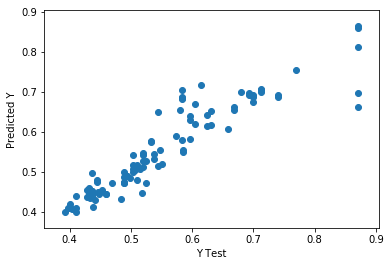

In [67]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [68]:
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, y_pred)

In [69]:
"MSE:", final_mse

('MSE:', 0.002009773625211572)

In [70]:
"RMSE:", final_rmse

('RMSE:', 0.044830498828493666)

In [71]:
"MAE:", final_mae

('MAE:', 0.027771743525710765)

#### Residual Plot:
#### In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual.

#### Residual = Observed value - Predicted value e = y - ŷ

#### Both the sum and the mean of the residuals are equal to zero. That is, Σ e = 0 and e = 0.

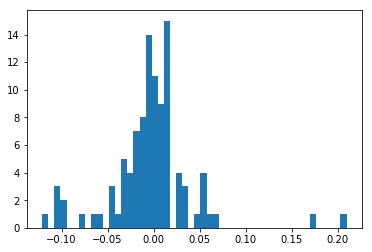

In [72]:
plt.hist((y_test-y_pred),bins=50);